Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten different classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

1. Import library dependencies

In [ ]:
# import needed library 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2. Data Loading

In [ ]:
# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# view data shape
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

- Training samples: 50000

- Testing samples: 10000

- Pixels: 32 x 32 (each sample)

- RGB channels: 3

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# 2 dimensional array
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Although y train is a 2D array, a 1D array will suffice for our classification. Consequently, we will change this to a 1D array.

In [ ]:
# reshape becoming 1 dimensional array, -1 means first dimension stays same
y_train = y_train.reshape(-1,) 
y_train[:5] 

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
# create array
classes = ["airplane", "automobile", "bird", "cat","deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
# plot image to see what they are
def plot_sample(X, y, index):
  # control image size
  plt.figure(figsize = (15, 2))

  # show element
  plt.imshow(X_train[index])

  # label each classes in numbers
  plt.xlabel(classes[y[index]])

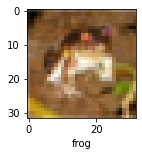

In [ ]:
plot_sample(X_train, y_train, 0)

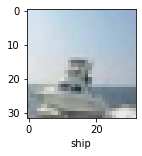

In [ ]:
plot_sample(X_train, y_train, 100)

3. Normalize training data

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Normalize the pictures to a value between 0 and 1. Each of the image's three channels, R, G, and B, can have a bit value between 0 and 255. Therefore, we must divide it by 255 in order to normalize in the 0 - 1 range.

4. Classify images with Artificial Neural Network (ANN)

In [ ]:
# flatten and dense
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [ ]:
# defines loss func, optimizer and metrics
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# measure how well ML model generalizes
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8115 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6240 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5416 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4816 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4320 - accuracy: 0.4978


The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other.

- Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. 
- Dense adds the fully connected layer to the neural network.

Activation function:

- ReLU is An output is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
- Softmax is an application to multiclass problems. Used in the last output layer to transforms the raw outputs of the neural network into a vector of probabilities

Optimizer: Algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.

Loss: Implies how poorly or well a model behaves after each iteration of optimization.

Metrics: Used to measure the algorithm's performance in an interpretable way

Fit function adjusts weights according to data values so that better accuracy can be achieved

In [ ]:
# produce classification report as summary
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 38ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.67      0.52      0.58      1000
           2       0.34      0.39      0.36      1000
           3       0.29      0.51      0.37      1000
           4       0.44      0.21      0.28      1000
           5       0.53      0.18      0.27      1000
           6       0.37      0.77      0.50      1000
           7       0.81      0.25      0.38      1000
           8       0.47      0.75      0.58      1000
           9       0.67      0.35      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.43     10000
weighted avg       0.51      0.45      0.43     10000



At the end of 5 epochs, the accuracy of ANN is at around 49%.

Classification report:
- Precision:- Accuracy of positive predictions. Precision = TP/(TP + FP)

- Recall:- Fraction of positives that were correctly identified. Recall = TP/(TP+FN)

- F1 Score = 2* (Recall * Precision) / (Recall + Precision). The weighted average of F1 should be used to compare classifier models, not global accuracy.

5. Classify images with Convolutional Neural Network (CNN)

In [80]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #flatten and dense
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')                
  ])

In [81]:
# defines loss func, optimizer and metrics
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 202s 129ms/step - loss: 1.3400 - accuracy: 0.5173
Epoch 2/10
1563/1563 [==============================] - 198s 127ms/step - loss: 0.9240 - accuracy: 0.6761
Epoch 3/10
1563/1563 [==============================] - 196s 125ms/step - loss: 0.6856 - accuracy: 0.7592
Epoch 4/10
1563/1563 [==============================] - 194s 124ms/step - loss: 0.4602 - accuracy: 0.8370
Epoch 5/10
1563/1563 [==============================] - 193s 123ms/step - loss: 0.2714 - accuracy: 0.9041
Epoch 6/10
1563/1563 [==============================] - 193s 123ms/step - loss: 0.1759 - accuracy: 0.9391
Epoch 7/10
1563/1563 [==============================] - 193s 124ms/step - loss: 0.1296 - accuracy: 0.9558
Epoch 8/10
1563/1563 [==============================] - 202s 129ms/step - loss: 0.1064 - accuracy: 0.9649
Epoch 9/10
1563/1563 [==============================] - 200s 128ms/step - loss: 0.0947 - accuracy: 0.9693
Epoch 10/10
1563/1563 [=======================

Conv2D: The numbers of filters that convolutional layers will learn from. Image X Filter/Kernel = Feature.

Max Pooling: Helps reduce the spatial size of the convolved features and also helps reduce over-fitting by providing an abstracted representation of them. Convolved Feature - > Max Pooled Feature

With CNN, accuracy was at about 70% after 5 epochs, which is a huge improvement above ANN. The best image classification algorithm is CNN, which has excellent accuracy. Additionally, computation is significantly lower than with a basic ANN since maxpooling minimizes the image dimensions while maintaining the features.

In [83]:
# returns loss and metrics accuracy
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.7687 - accuracy: 0.6971


[1.7687376737594604, 0.6970999836921692]

In [84]:
# generate output predictions
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 11s 34ms/step


array([[5.6516600e-11, 7.5787936e-09, 9.0724018e-07, 9.9742872e-01,
        4.2595882e-09, 2.5703644e-03, 1.0131984e-10, 4.3044732e-10,
        9.8595421e-10, 1.4025101e-10],
       [2.2820617e-09, 8.5894681e-07, 1.5049931e-14, 1.1391490e-17,
        7.1434987e-19, 1.1528433e-20, 1.8877660e-15, 3.9307439e-19,
        9.9999911e-01, 9.5284316e-13],
       [8.3930679e-03, 2.7693903e-02, 7.0469454e-05, 9.3270537e-05,
        1.1724077e-04, 9.1850088e-05, 1.1369148e-05, 8.4693442e-05,
        9.6140641e-01, 2.0377412e-03],
       [9.3991834e-01, 4.5781730e-06, 2.4167033e-02, 3.3373749e-06,
        1.7518002e-04, 1.5514477e-10, 1.7189675e-06, 4.0871033e-08,
        3.5729360e-02, 4.3515684e-07],
       [1.0752438e-11, 5.6338857e-11, 4.8952723e-05, 9.2366347e-05,
        1.7291304e-02, 4.8605453e-09, 9.8256737e-01, 1.9144305e-13,
        8.4358520e-09, 2.8816893e-13]], dtype=float32)

predict(): Generates output predictions for the input samples (this is for somewhere between training and testing time). 

evaluate(): Returns the loss value & metrics values for the model in test mode

In [85]:
# finds out which element is the max in predicted array
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [86]:
# reshape becoming 1d dimension
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

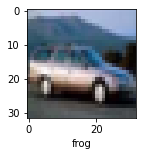

In [89]:
# display image of element index 3 in the array which is 3
plot_sample(X_test, y_test, 4)

In [90]:
# display classification result
classes[y_classes[3]]

'airplane'